# Tutorial 2 Arrays and Functions for Scientific Computing

## The `numpy` **module** is used in almost all numerical computation using Python. 

## A **function** is a specialized operation that has been programmed to take one or more *input* variables and return one or more *output* variables.  

## In this Tutorial, we will learn about a number of numpy functions that are useful.  I am not going to cover every numpy function.  Im not even going to cover most of them. 

## I am going to cover some very useful ones, and then I am going to briefly discuss how to search for a numpy function.



## Import the numpy module

In [1]:
import numpy as np

## I'm also going to specifically import the random submodule in order to make my code easier to read
## I will also start the random number generator

In [2]:
from numpy import random
myseed = 1967
rng = random.default_rng(seed = myseed)

## 2.0 A blitz review of indexing into arrays and matrices

### Examine these examples, to review indexing into arrays and matrices.  

In [4]:
v = rng.integers(0,10,10) # 10 integers from 0 to 9 
M = rng.integers(0,10,(5,6)) # 5 rows and 6 columns 


### Extract index 0,2,4 from v into a new array w

In [5]:
w = v[0:6:2]
print(v)
print(w)

[6 6 7 2 3 5 2 5 0 4]
[6 7 3]


### Lets insert 3 new values in to array at index 1,4,7
### I am going to draw them from the range -10 to 0

In [6]:
u = rng.integers(-10,0,3)
print(u)
v[1:10:3] = u  # replace these with u 
print(v) #print new values in v 

[ -5 -10  -5]
[  6  -5   7   2 -10   5   2  -5   0   4]


### 2.0.1 Shorcuts and tricks 

In [7]:
A = rng.integers(0,10,8)
print(A)

[8 8 3 3 1 6 6 2]


In [8]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([8, 3, 1, 6])

In [9]:
A[:3] # first three elements

array([8, 8, 3])

In [10]:
A[3:] # all elements from index 3

array([3, 1, 6, 6, 2])

### And the most useful shortcut, to get the last n elements of an array A[-n:]

In [11]:
A[-3:]

array([6, 6, 2])

### 2.0.2 Index Slicing in Matrices

In [12]:
B = rng.integers(1,7,(7,7))
print(B)

[[5 3 1 4 5 3 6]
 [1 5 6 5 5 3 3]
 [2 3 3 3 3 6 6]
 [3 2 6 3 5 1 5]
 [3 5 5 6 5 4 6]
 [6 1 5 2 3 4 4]
 [4 5 3 5 6 1 2]]


In [13]:
#Grab the 3rd  row from the matrix (index = 1) 
B[2,:]

array([2, 3, 3, 3, 3, 6, 6])

In [14]:
#Grab the 4th column from the matrix 
B[:,3]


array([4, 5, 3, 3, 6, 2, 5])

In [15]:
# a block from the original array
C = B[0:2, 1:3]
print(C)

[[3 1]
 [5 6]]


In [16]:
#Alternate rows and columns from the original array 
D = B[::2, ::2]
print(D)

[[5 1 5 6]
 [2 3 3 6]
 [3 5 5 6]
 [4 3 6 2]]


## 2.1 Sorting functions for `numpy` arrays

### In many operations with data it is useful to be able to sort the data from lowest to highest, or highest to lowest. 

### To faciliate these examples, I am going to make an array v and a matrix m. 


In [17]:
v = rng.integers(1,7,10)  # 20 random numbers between 1 and 6
M = rng.integers(1,7,(6,10)) # 6 by 10 matrix containing random numbers between 1 and 6 

### 2.1.1 Array sort

### It's not surprising that the function that will sort an array is called `sort`

In [18]:
v_sorted = np.sort(v)
print('v =', v)
print('v_sorted =',v_sorted)

v = [1 6 4 6 2 1 4 2 4 2]
v_sorted = [1 1 2 2 2 4 4 4 6 6]


### Numpy `sort` function always sorts from lowest to highest.  What if I wanted to sort from highest to lowest? 

### Numpy has a `flip` function that allows up reverse the order of the elements in an array. 

In [19]:
v_flipped = np.flip(v)
print('v_flipped = ', v_flipped)


v_flipped =  [2 4 2 4 1 2 6 4 6 1]


### It would take two commands to sort an array from the highest to the lowest element. 

In [20]:
v_sorted = np.sort(v)
v_sorted = np.flip(v_sorted)
print('v_sorted =', v_sorted)

v_sorted = [6 6 4 4 4 2 2 2 1 1]


### I could actually do it one step by **nesting** my functions like this. 

In [21]:
v_sorted = np.flip(np.sort(v)) # I implicitly take the output of np.sort and enter into np.flip
print('v_sorted =', v_sorted)

v_sorted = [6 6 4 4 4 2 2 2 1 1]


### 2.1.2 Matrix sort

### What does sorting a matrix (or any array with more than one dimension) do? 

In [22]:
M_test = np.sort(M)
print('M')
print(M)
print('M_test')
print(M_test)

M
[[3 5 1 2 3 2 3 1 3 5]
 [1 6 3 2 4 4 5 3 6 6]
 [4 3 2 4 2 2 5 6 4 4]
 [4 2 1 3 6 4 1 6 2 5]
 [6 5 5 6 2 2 6 3 3 1]
 [3 6 1 2 1 2 6 5 6 4]]
M_test
[[1 1 2 2 3 3 3 3 5 5]
 [1 2 3 3 4 4 5 6 6 6]
 [2 2 2 3 4 4 4 4 5 6]
 [1 1 2 2 3 4 4 5 6 6]
 [1 2 2 3 3 5 5 6 6 6]
 [1 1 2 2 3 4 5 6 6 6]]


### If we compare the two matrices, it looks like it took each row of M and applied a sort to it.

### When sorting a matrix or higher dimension array, we can make explicit which dimension we want to apply the sort along. 

### Recall that in a matrix (2 dimensional array), the first dimension or in python *axis* is 0 and the second dimension or *axis* is 1.  

In [24]:
M_sorted_0 = np.sort(M, axis = 0)
M_sorted_1 = np.sort(M, axis = 1)
print('M before being sorted')
print(M)
print('M_sorted_0')
print(M_sorted_0)
print('M_sorted_1')
print(M_sorted_1)

M before being sorted
[[3 5 1 2 3 2 3 1 3 5]
 [1 6 3 2 4 4 5 3 6 6]
 [4 3 2 4 2 2 5 6 4 4]
 [4 2 1 3 6 4 1 6 2 5]
 [6 5 5 6 2 2 6 3 3 1]
 [3 6 1 2 1 2 6 5 6 4]]
M_sorted_0
[[1 2 1 2 1 2 1 1 2 1]
 [3 3 1 2 2 2 3 3 3 4]
 [3 5 1 2 2 2 5 3 3 4]
 [4 5 2 3 3 2 5 5 4 5]
 [4 6 3 4 4 4 6 6 6 5]
 [6 6 5 6 6 4 6 6 6 6]]
M_sorted_1
[[1 1 2 2 3 3 3 3 5 5]
 [1 2 3 3 4 4 5 6 6 6]
 [2 2 2 3 4 4 4 4 5 6]
 [1 1 2 2 3 4 4 5 6 6]
 [1 2 2 3 3 5 5 6 6 6]
 [1 1 2 2 3 4 5 6 6 6]]


### Specifying axis = 0 sorted each column along the rows.
### Specifying axis = 1 sorted each row along the columns. 
### The default behavior of `sort` is to sort along the last axis.
### It's good practice to specify the *axis* along which you want to sort unless its a simple array. 

### If I need to sort a matrix along descending order, I can use the sort function as above, and the `flip` function also specifying an axis 

In [25]:
M_sorted_1 = np.flip(M_sorted_1,axis =1)
print(M_sorted_1)

[[5 5 3 3 3 3 2 2 1 1]
 [6 6 6 5 4 4 3 3 2 1]
 [6 5 4 4 4 4 3 2 2 2]
 [6 6 5 4 4 3 2 2 1 1]
 [6 6 6 5 5 3 3 2 2 1]
 [6 6 6 5 4 3 2 2 1 1]]


### 2.1.3 Ordered Indices - `argsort`

### In many (*most?*) circumstances you don't only want to be able to obtain a sorted list of items, but you also want to know *what order of indices* produces the sorted list.  This may not seem obvious, but i will make some examples here that illustrate why this is important. 

In [26]:
v = random.randint(1,7,10)
v_sorted = np.sort(v) #This obtains a sorted list in increasing order. 

### The `argsort` function tells you the order of indices to sort an array

In [29]:
sort_order = np.argsort(v) #This obtains a list of ordered indices that you could use to sort v 
print('i = ',np.arange(0,10,1)) # i just wanted to track the index 
print('v = ',v)
print('sort_order = ',sort_order)

i =  [0 1 2 3 4 5 6 7 8 9]
v =  [5 1 1 3 6 1 5 5 3 4]
sort_order =  [1 2 5 3 8 9 0 6 7 4]


In [30]:
v_sorted_byorder = v[sort_order]
print('v_sorted = ',v_sorted)
print('v_sorted_byorder = ', v_sorted_byorder)

v_sorted =  [1 1 1 3 3 4 5 5 5 6]
v_sorted_byorder =  [1 1 1 3 3 4 5 5 5 6]


### Why is this useful? 

### Many times, we want to sort data on one variable, *and sort other variables in the same order*

### I provide an example here. 

In [31]:
age = np.array([55,58,72,46,48,65]) #age in years
LDL = np.array([65,90,120,55,70,100]) #LDL - bad cholesterol 

### I want to quickly look at those numbers and determine if LDL (bad cholesterol) goes up with age.  
### What I'm going to do is sort the data by age and then use that sort order with the LDL data. 

In [32]:
age_order = np.argsort(age)
age_sorted = age[age_order]
LDL_sorted_byage = LDL[age_order]
print('age = ', age_sorted)
print('LDL = ', LDL_sorted_byage)

age =  [46 48 55 58 65 72]
LDL =  [ 55  70  65  90 100 120]


### We can also use this approach with a matrix and sort one column (or row)  and apply that ordering to the other columns (or rows)

##  2.2 Mathematical Functions in numpy

### Numpy has built in a large number of mathematical functions.  

### 2.2.1 Basic Math
### Of course the basic operations will work on numpy arrays, element by element:
* +, addition                                  
* -, subtraction
* \*, multiplication
* / division 
* \*\*, exponentiation 
* //, floor division or integer division 
* %, remainder 
### **THEY WILL ONLY WORK WITH A CONSTANT OR WITH ARRAYS OF THE SAME SIZE**

In [33]:
a = np.array([0.5, 1,2])
b = np.array([4,6,8]) 
c = np.array([-1,1])
print(a)
print(b)
#lets test the operations above. 

[0.5 1.  2. ]
[4 6 8]


### This is just a self exercise, to make sure you are comfortable with doing basic math operations. 
## verify what happens when you do 
*   a+b
*   a-b
*   a*b
*   a/b
*   a**2
*   b/3
*   b//3
*   b%3 
### You dont need to submit these responses.  Just do it for yourself in the box below. 
### Also confirm you cannot do this 
*   a+c
### This is because the arrays do not match in size.  


In [34]:
print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a**2)
print(b/3)
print(b//3)
print(b%3)

[ 4.5  7.  10. ]
[-3.5 -5.  -6. ]
[ 2.  6. 16.]
[0.125      0.16666667 0.25      ]
[0.25 1.   4.  ]
[1.33333333 2.         2.66666667]
[1 2 2]
[1 0 2]


### 2.2.2 Manipulating Sign and Data Type
### There are also some basic manipulation of the sign and type of data:
* absolute, computes the absolute value
* rint, rounds to the nearest integer
* floor, discard the decimal and return integer value  
* ceil, return the first integer higher than the number
* sign, returns -1 for negative values and 1 for positive values 

In [35]:
c = np.array([-1.5, -0.5, 0,0.5, 1])
print(c)
#let's test the operations above

[-1.5 -0.5  0.   0.5  1. ]


### Please attempt each of the functions above to familiarize yourself with the output.   

### 2.2.3 Maximum and minimum 

### There are three pairs of functions that handle maximum and minimum of arrays. 

## First, within an array to find the maximum/minimum along a dimension (*axis* uses 
* `amax`
* `amin` 

## Second, to find the index of the maximum or minimum element of an array we make use of 
* `argmax`
* `argmin`

### Third, to compare two equal size arrays element by element, use 
* `maximum`
* `minimum` 

In [36]:
v = rng.integers(1,21,15)
M = rng.integers(1,21,(5,6))

### Lets get the maximum of v and find the index where the maximum is found

In [37]:
maxv = np.max(v)
index_maxv = np.argmax(v)
print('v = ',v)
print('maxv = ',maxv)
print('index_maxv =', index_maxv)

v =  [17  2 17 10 19  7 14 12 20 10  9 19 18  6 12]
maxv =  20
index_maxv = 8


### Lets get the minimum of v and find the index where the minimum is found

In [38]:
minv = np.min(v)
index_minv = np.argmin(v)
print('v = ',v)
print('minv = ',minv)
print('index_minv =', index_minv)

v =  [17  2 17 10 19  7 14 12 20 10  9 19 18  6 12]
minv =  2
index_minv = 1


### When working with a matrix we should specify an *axis*

In [39]:
maxM_0 = np.max(M,axis = 0)
maxM_1 = np.max(M,axis = 1)
print('M')
print(M)
print('max, axis = 0')
print(maxM_0)
print('min, axis = 1')
print(maxM_1)

M
[[ 4  3  4  3  1  3]
 [ 8 15 14  6 17 12]
 [19 11  8 15 12  2]
 [16  9  4 16  8  9]
 [ 1 14  1  7 17 12]]
max, axis = 0
[19 15 14 16 17 12]
min, axis = 1
[ 4 17 19 16 17]


### I can also compare two arrays element by element 

In [41]:
w = rng.integers(1,7,10)
u = rng.integers(1,7,10)
print('w = ',w)
print('u = ',u)
p = np.maximum(u,w)
q = np.minimum(u,w)
print('p (maximums between w and u) = ',p)
print('q (minimums between w and u)= ',q)

w =  [4 1 1 4 2 5 4 2 5 1]
u =  [4 6 3 4 1 6 5 3 6 1]
p (maximums between w and u) =  [4 6 3 4 2 6 5 3 6 1]
q (minimums between w and u)=  [4 1 1 4 1 5 4 2 5 1]


### 4.2.4 Exponential and Logarithmic Functions 

### One set of immensely useful functions are exponential and logarithmic functions.

* exp, calculates exponential of all elements in an array 
* log, natural logarithm, ln, base e
* log10, base 10 logarithm 

In [42]:
x = np.linspace(0,2,10)
z = np.linspace(1,109,13)
# I'm gonna do some stuff here to make plots.  I'm making bad low-grade plots here.  
# I'll teach you to make good ones, next week 
from matplotlib import pyplot as plt

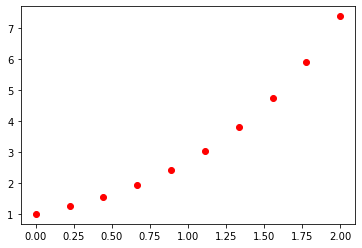

In [43]:
y = np.exp(x)
plt.plot(x,y,'ro')
plt.show()

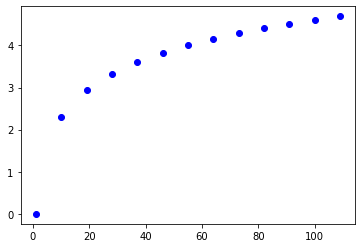

In [44]:
y = np.log(z)
plt.plot(z,y,'bo')

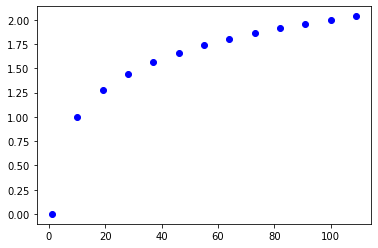

In [45]:
y = np.log10(z)
plt.plot(z,y,'bo')

### 4.2.5 Trignometric Functions

### Trignometric functions are also available.  I will not make use of these until the very end of the class when we synthesize sound.  But yes you can make, sin, cos, tan, etc. 

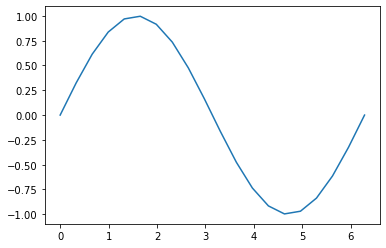

In [46]:
angle_in_degrees = np.linspace(0,360,20)
angle_in_radians = angle_in_degrees*np.pi/180
z = np.sin(angle_in_radians)
plt.plot(angle_in_radians,z)
plt.show()

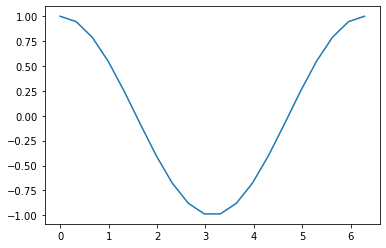

In [47]:
angle_in_degrees = np.linspace(0,360,20)
angle_in_radians = angle_in_degrees*np.pi/180
z = np.cos(angle_in_radians)
plt.plot(angle_in_radians,z)
plt.show()